### AI-Hub 금융 ocr 데이터set을 yolov5 학습용으로 전환
    - input: 다양한 size의 image, x, y, w, h 형태의 label
    - output: 640 x 640 size의 image, centerX, centerY, w, h형태의 label

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [7]:
img = cv2.imread('New_Sample/images/bank_00001.jpg', cv2.IMREAD_GRAYSCALE)

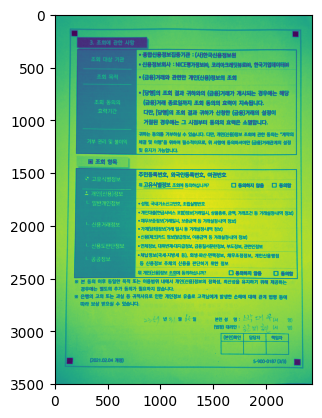

In [9]:
plt.imshow(img, cmap='gary')

In [10]:
with open('New_Sample/annotations/bank_00001.json', encoding='UTF8') as f:
    json_object = json.load(f)

In [11]:
json_object

{'Identifier': 'bank_00001',
 'name': 'bank_00001.jpg',
 'src_path': '/result/bank/images/bank_00001.jpg',
 'label_path': '/result/bank/annotations/bank_00001.json',
 'category': 0,
 'type': 1,
 'images': [{'identifier': 'bank_00001',
   'name': 'bank_00001.jpg',
   'type': 'jpg',
   'width': 2440,
   'height': 3501,
   'data_captured': '2021:08:06 17:28:26',
   'shutter_speed': '32',
   'f_stop': '2',
   'gps': '',
   'age': 58,
   'gender': 'female',
   'writer_num': 'bys-bang@hanmail.net',
   'shooting_env': '실내',
   'dust': '없음',
   'class': '금융',
   'persona': '60대이상',
   'document_name': '정보보안동의서'}],
 'annotations': [{'polygons': [{'id': '124d002e-1f01-4ab8-b7c5-e8f51c56c9d9',
     'type': 1,
     'text': '3.',
     'points': [[327.2859813379219, 293.6828955017222],
      [327.2859813379219, 246.57668915558662],
      [370.30964980072577, 246.57668915558662],
      [370.30964980072577, 293.6828955017222]]},
    {'id': '18c0eb01-1902-4d8d-bd06-290cb0d6c8fb',
     'type': 1,
     '

In [12]:
json_object['annotations'][0]['bbox']

[{'id': '124d002e-1f01-4ab8-b7c5-e8f51c56c9d9',
  'x': 327.2859813379219,
  'y': 246.57668915558662,
  'width': 43.02366846280387,
  'height': 47.10620634613559},
 {'id': '18c0eb01-1902-4d8d-bd06-290cb0d6c8fb',
  'x': 390.40829784174355,
  'y': 245.6345650286639,
  'width': 136.92203977943416,
  'height': 51.8168269807492},
 {'id': '77ee31d0-8612-431c-a464-74c1b1f6f32c',
  'x': 548.0570684134775,
  'y': 245.6345650286639,
  'width': 93.27028856534855,
  'height': 51.8168269807492},
 {'id': 'bf7be586-74f2-48c4-badd-245499473158',
  'x': 658.5996326390757,
  'y': 245.63456502866393,
  'width': 95.46857819483489,
  'height': 54.015116610235566},
 {'id': '2c8f25e0-3d9d-4d61-9cfa-d1906d208f7a',
  'x': 335.98276144975085,
  'y': 404.92813082518467,
  'width': 92.78980526061792,
  'height': 50.20343941339405},
 {'id': '54ec5bf2-e105-4683-9850-79770bdf1733',
  'x': 454.0474017253879,
  'y': 405.2743614418288,
  'width': 90.01996032746513,
  'height': 51.93459249661453},
 {'id': '57d1abf1-484b-

In [17]:
x_size, y_size = img.shape[1], img.shape[0]

In [13]:
for dic in json_object['annotations'][0]['bbox']:
    x, y, width, height = int(dic['x']), int(dic['y']), int(dic['width']), int(dic['height'])
    if y+height < x_size:
        cv2.rectangle(img, (x, y), (x + width, y + height), (0, 255, 0), 2)

NameError: name 'x_size' is not defined

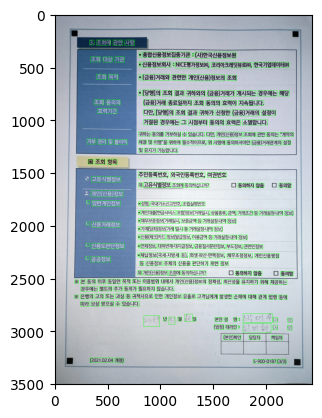

In [33]:
plt.imshow(img[:,:,::-1])

In [14]:
img[:min(img.shape[0], img.shape[1]),:].shape

(2440, 2440)

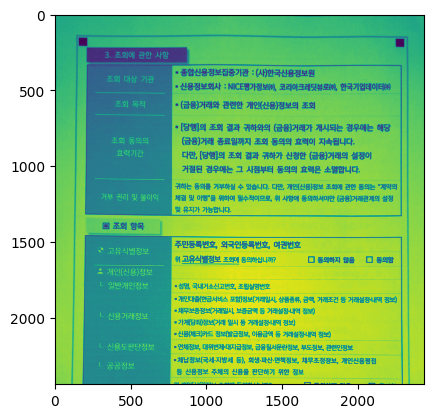

In [15]:
plt.imshow(img[:min(img.shape[0], img.shape[1])])

In [18]:
with open(f'{json_object["Identifier"]}.txt', 'w') as w:
    for dic in json_object['annotations'][0]['bbox']:
        x, y, width, height = int(dic['x']), int(dic['y']), int(dic['width']), int(dic['height'])
        if y+height < x_size:
            w.write(f'{0} {((x+x+width)/2)/x_size:4f} {((y+y+height)/2)/x_size:4f} {width/x_size:4f} {height/x_size:4f}\n')

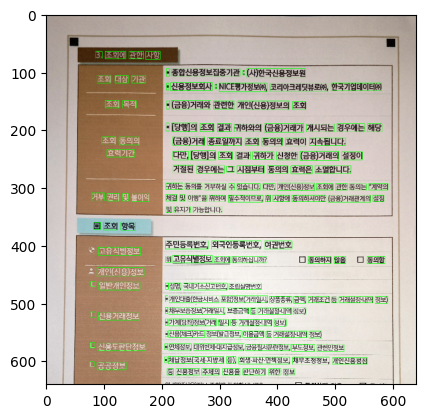

In [69]:
plt.imshow(cv2.resize(img[:min(img.shape[0], img.shape[1]),:,:], (640, 640)))

In [102]:
result = cv2.imread('New_Sample/00003.jpg')

In [103]:
def convert(x, y, w, h, size):
    x = int((x-w/2) * size)
    y = int((y-h/2) * size)
    w = int(w * size)
    h = int(h * size)
    return x, y, w, h

In [104]:
result.shape

(640, 640, 3)

In [105]:
with open('New_Sample/00003.txt') as t:
    for i in t:
        _, x, y, w, h = map(float, i.rstrip().split(' '))
        print(x, y, w, h)
        print(x, y, x+w, y+h)
        x, y, w, h = convert(x, y, w, h, 640)
        print(x, y, w, h)
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        break

0.158565 0.074901 0.078373 0.014881
0.158565 0.074901 0.236938 0.089782
76 43 50 9


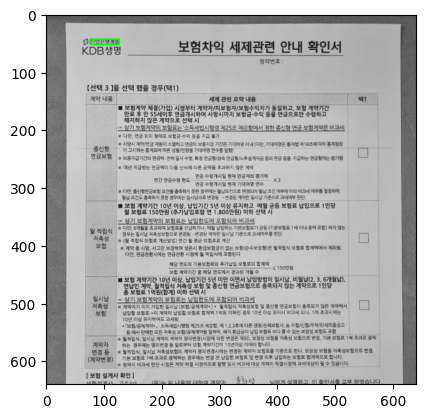

In [106]:
plt.imshow(result)